# Data Description:
The original data includes UIUC students' GPAs of each semesetr from 2010 to 2023 (https://github.com/wadefagen/datasets/tree/master/gpa). It contains 172 subjects, each with multiple courses, resulting in high data redundancy. Additionally, some courses have very short durations, making them less valuable for predictive analysis.

To improve the dataset's relevance, we will focus solely on the 15 subjects offered by The Grainger College of Engineering ('CSE'and'NE' are not included due to data missing from the original data).

Reference: https://courses.grainger.illinois.edu/


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model, svm
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

f_location = "https://drive.google.com/file/d/1abp6Oc3XLvN7x2l2r1RHMjWNwoCTanLV/view?usp=sharing"
data_raw = pd.read_csv('https://drive.google.com/uc?export=download&id=' + f_location.split('/')[-2]) #Convert to pandas DataFrames

target_subjects = ['ABE', 'AE', 'BIOE', 'CEE', 'CS', 'ECE', 'ENG', 'IE', 'ME', 'MSE', 'NPRE', 'PHYS', 'SE', 'TAM', 'TE']

#filtered data
data = data_raw[data_raw['Subject'].isin(target_subjects)].copy()

# Data Transfer:

Define the GPA values for each grade according to UIUC Grade Point Scale.

Reference: https://registrar.illinois.edu/courses-grades/explanation-of-grades/



In [ ]:
gpa_scale = {
    'A+': 4.00, 'A': 4.00, 'A-': 3.67, 'B+': 3.33, 'B': 3.00, 'B-': 2.67,
    'C+': 2.33, 'C': 2.00, 'C-': 1.67, 'D+': 1.33, 'D': 1.00, 'D-': 0.67, 'F': 0.00
}

In [ ]:
# Function to calculate the average GPA for each row
def calculate_average_gpa(row):
    total_gpa = 0
    total_courses = 0
    for grade, gpa in gpa_scale.items():
        count = row[grade] if grade in row else 0
        total_gpa += count * gpa
        total_courses += count
    return total_gpa / total_courses if total_courses > 0 else None

# Data Visualization
We use box plots to visualize each subject's average GPA by term and year, allowing us to more clearly identify issues such as missing data, imbalances, and sparsity in our filtered dataset across subjects.

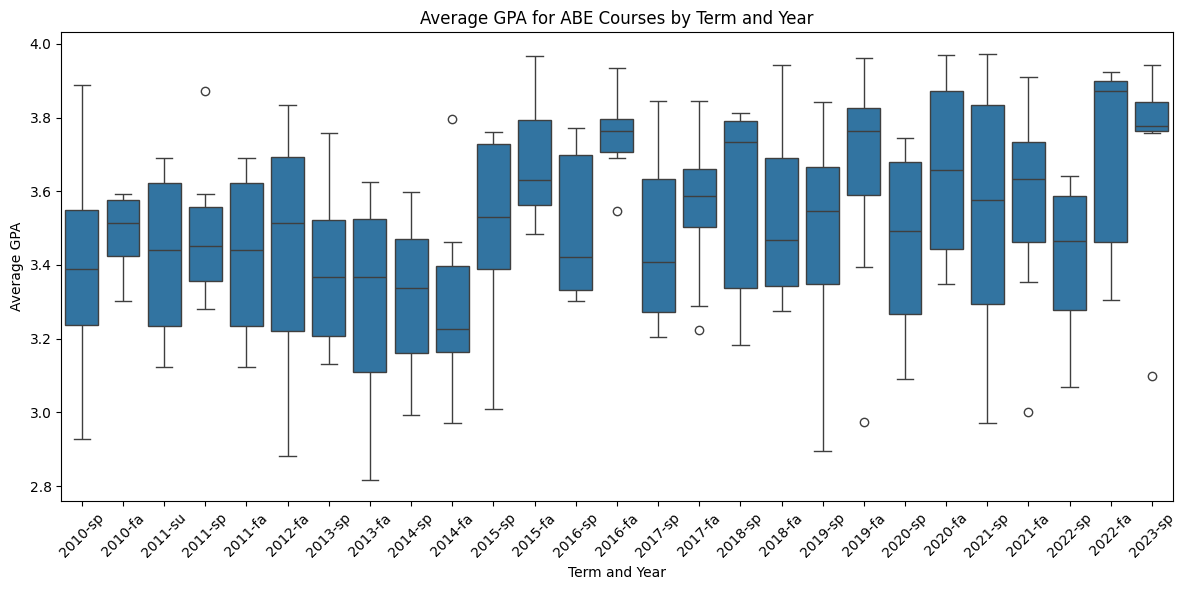

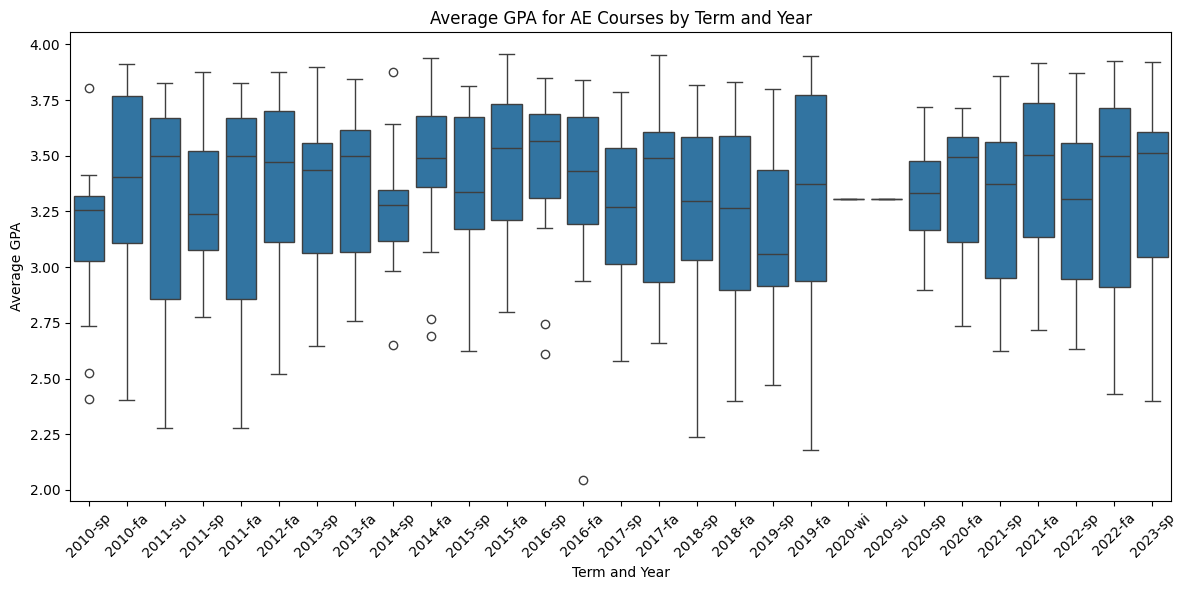

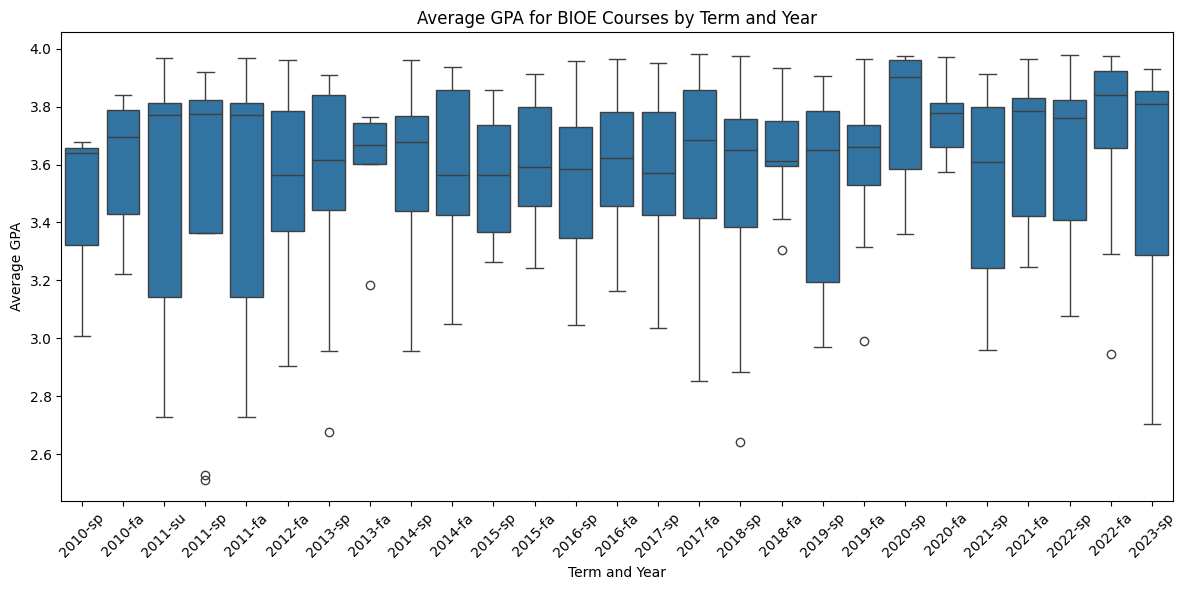

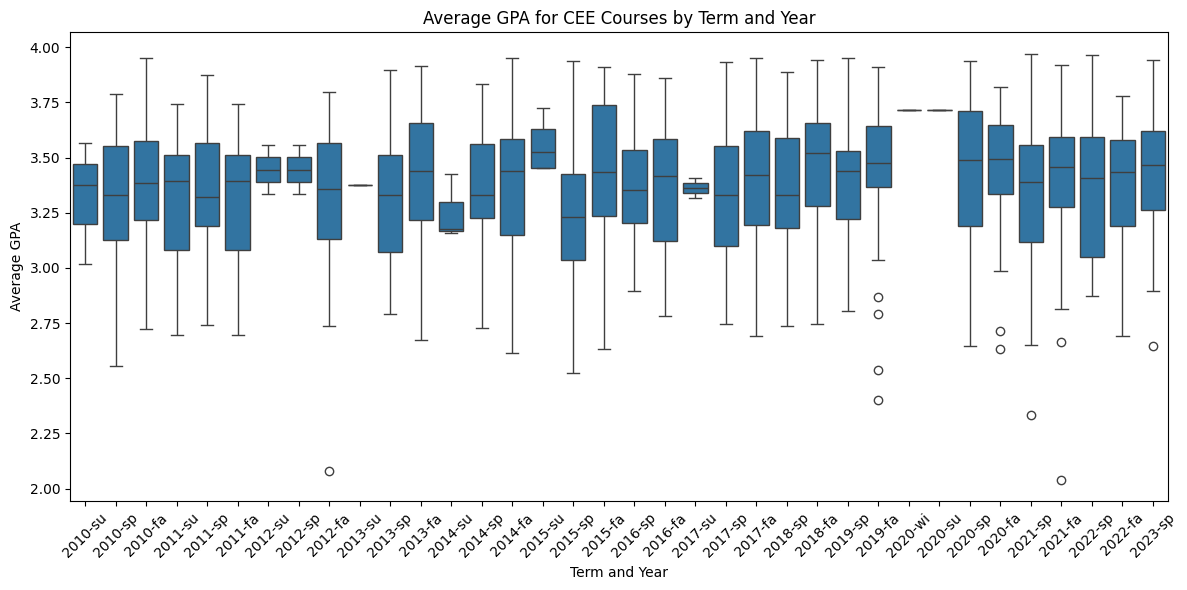

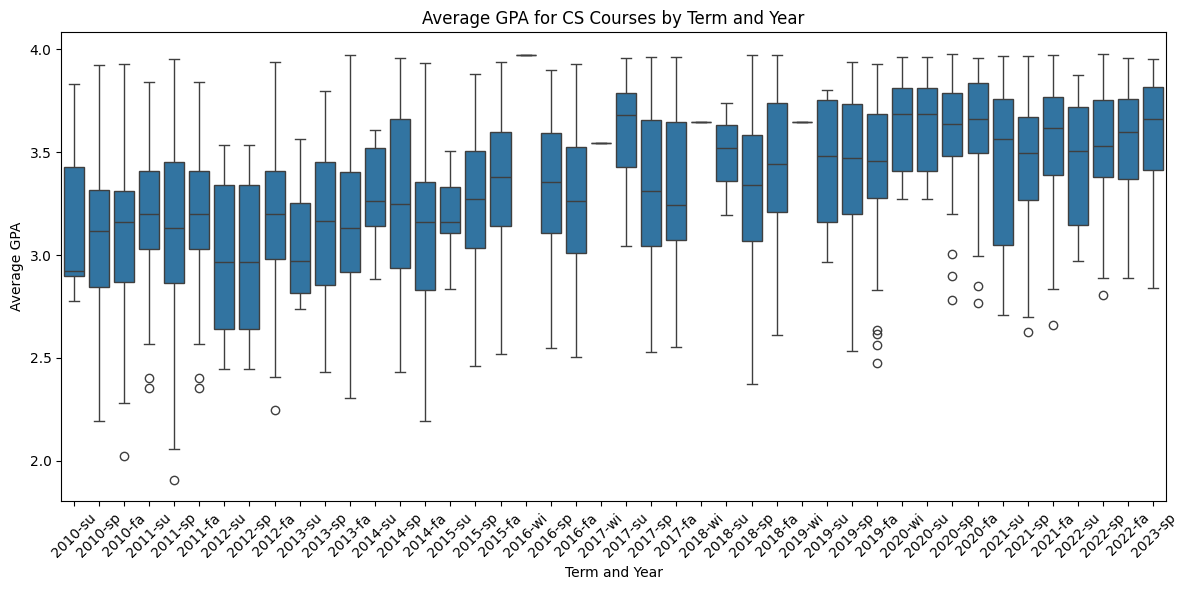

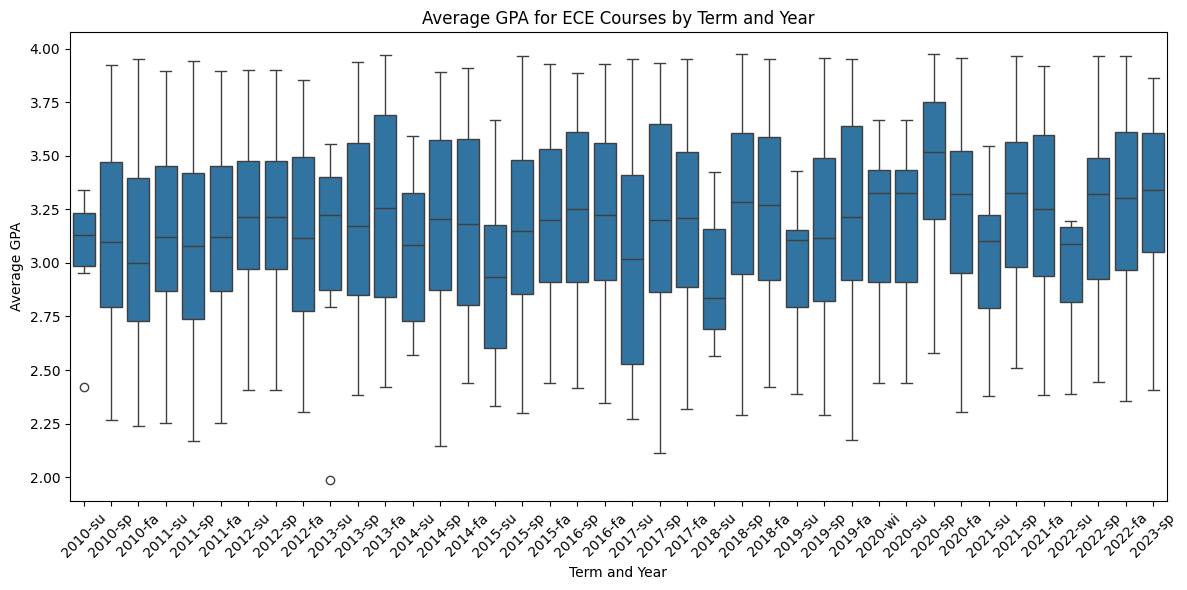

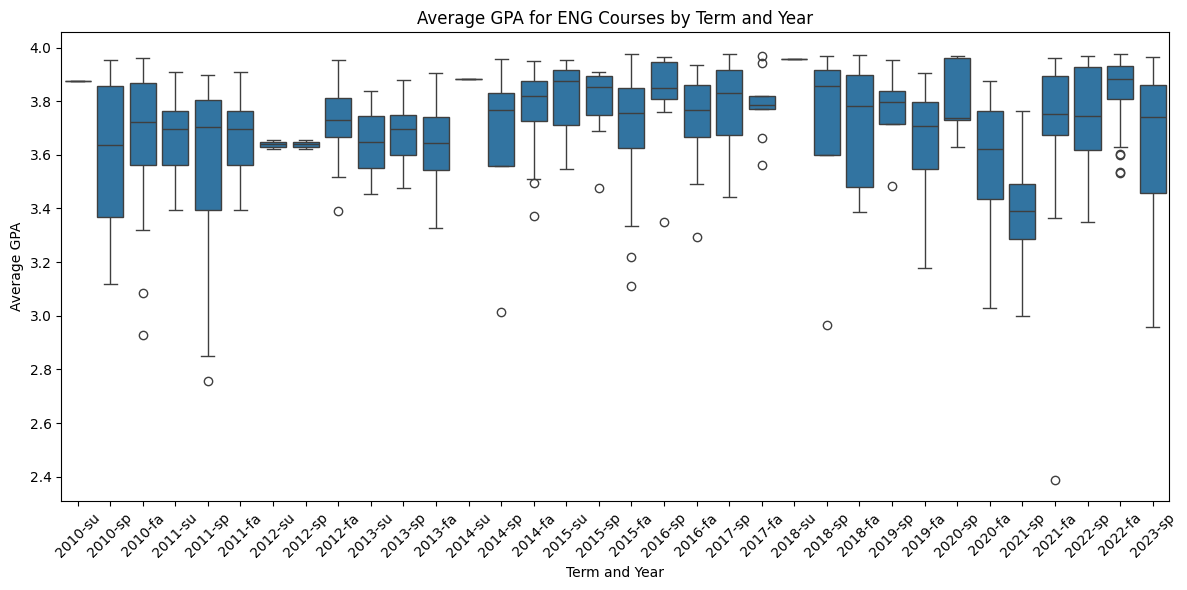

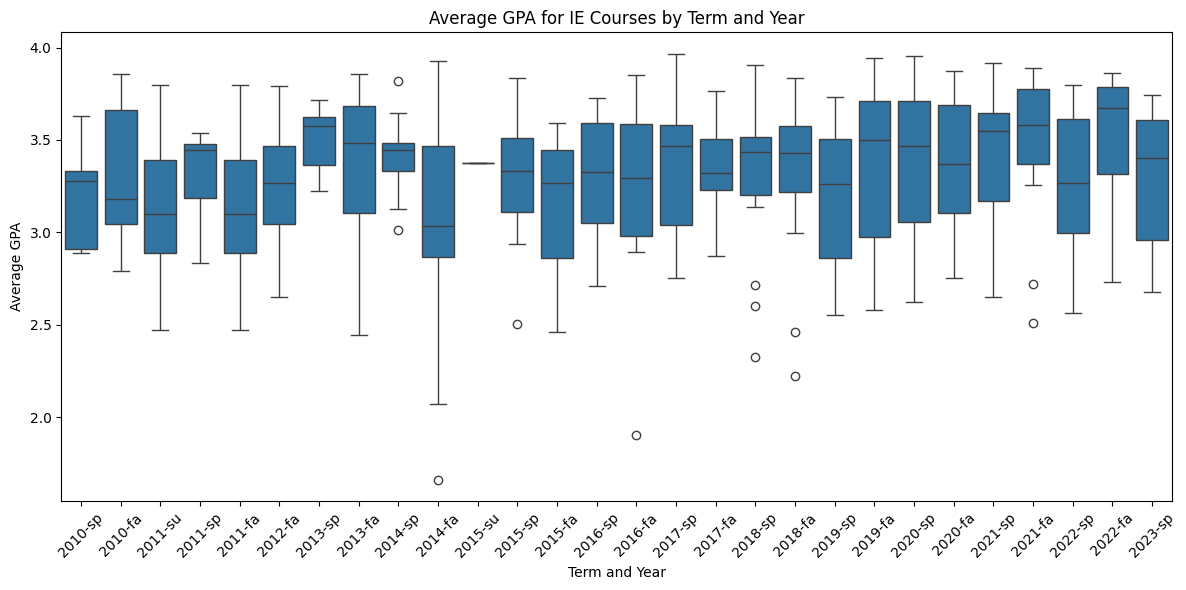

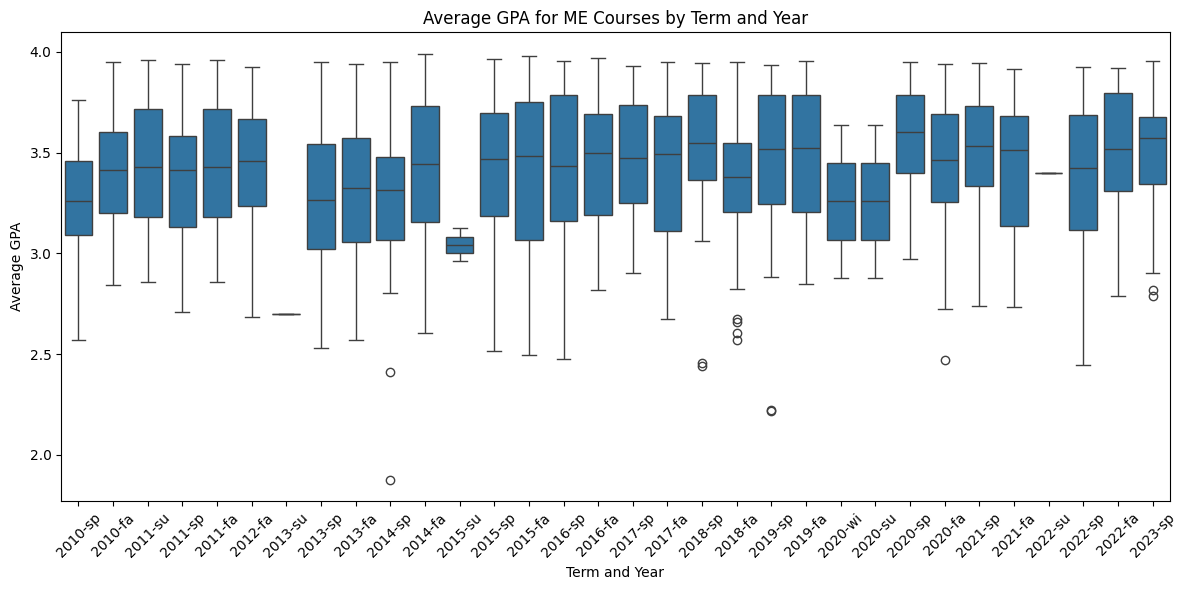

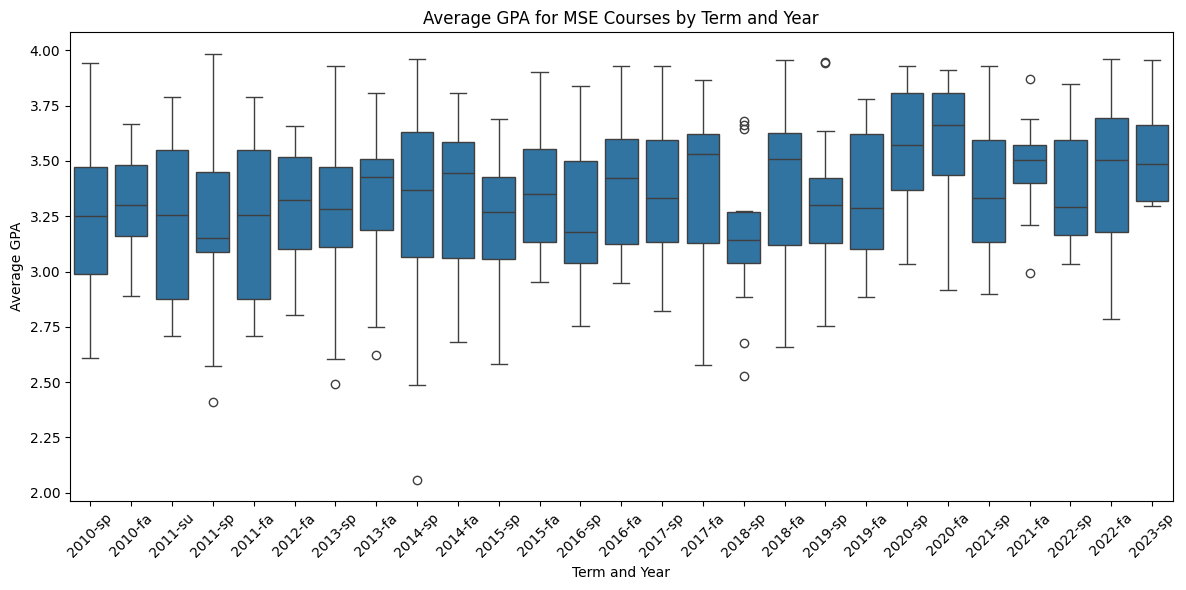

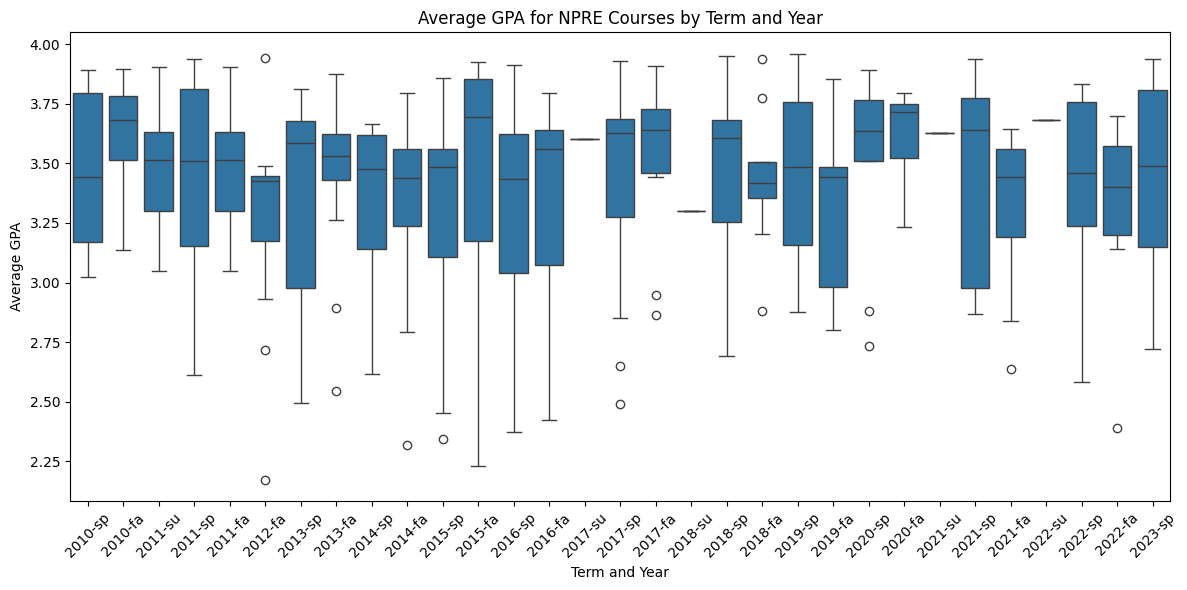

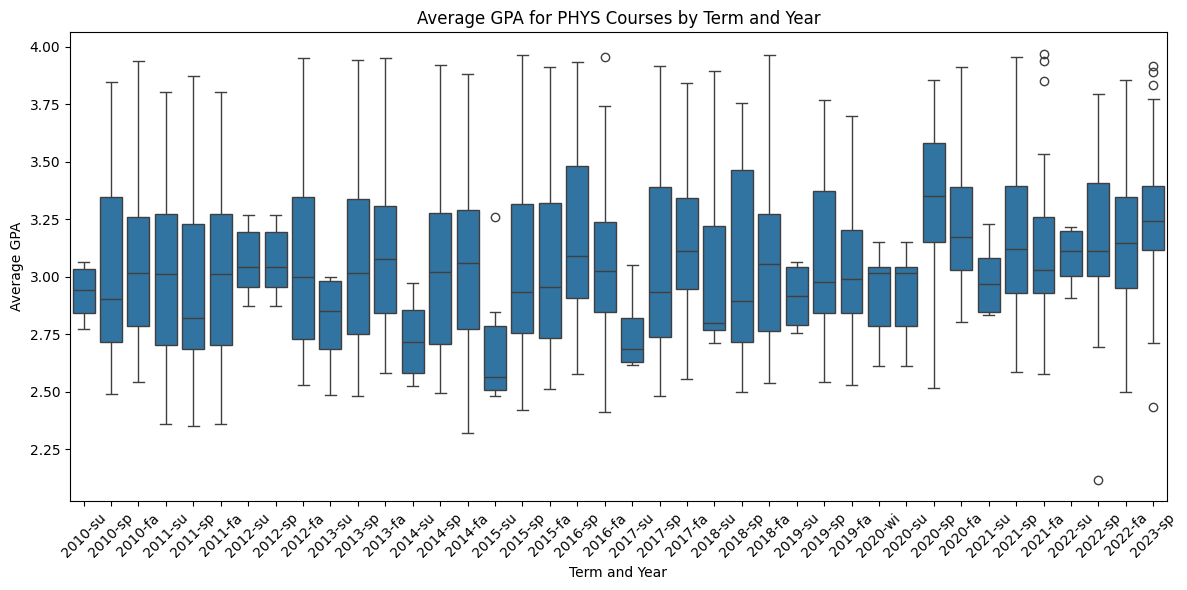

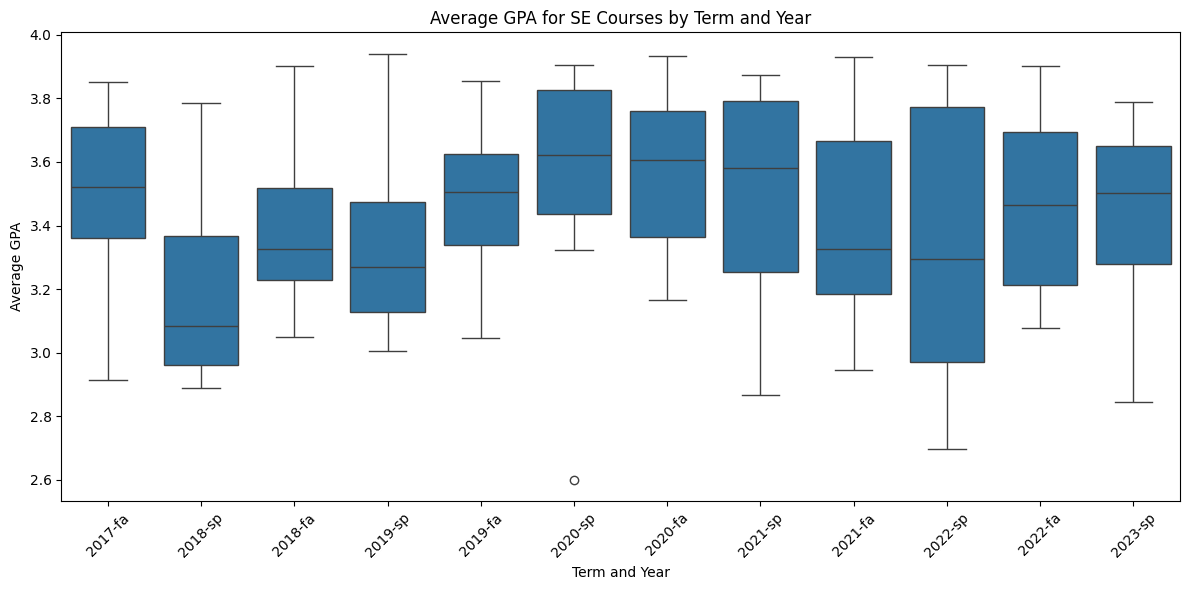

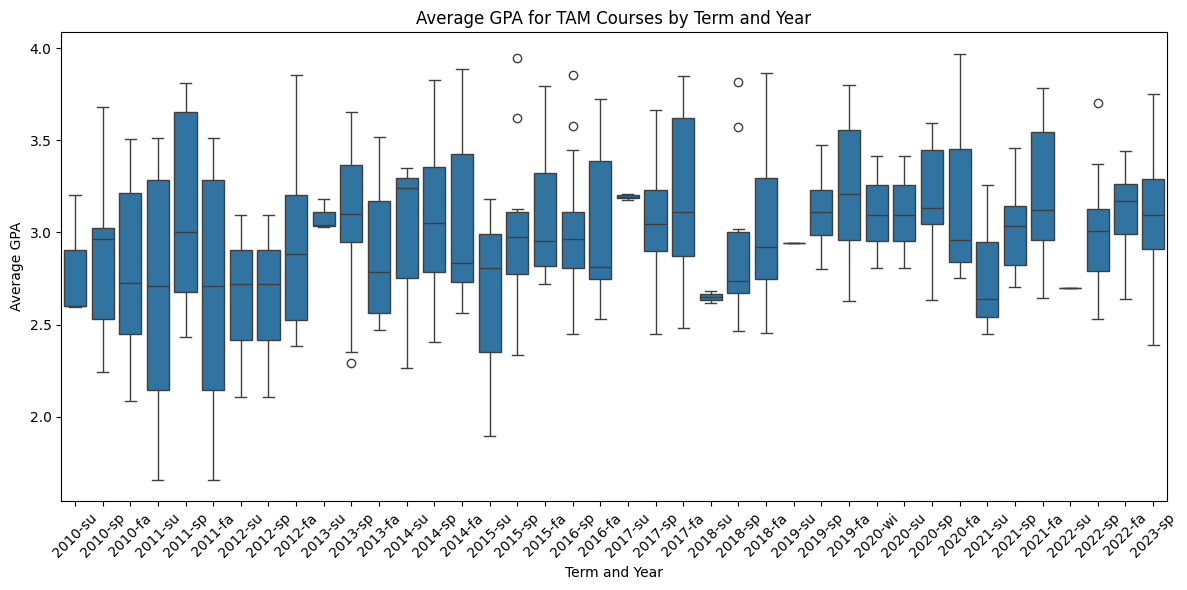

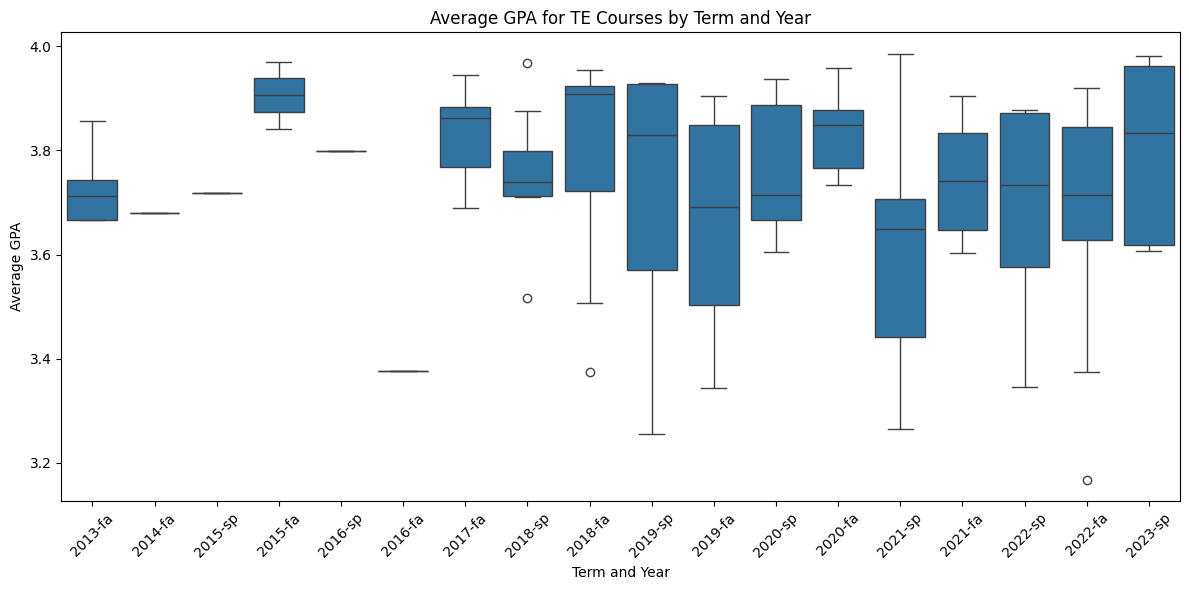

In [ ]:
# Apply the calculation to each row in the DataFrame
data['Average GPA'] = data.apply(calculate_average_gpa, axis=1)

# Generate box plots for all target subjects
for subject in target_subjects:
    subject_data = data[data['Subject'] == subject]
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=subject_data, x='YearTerm', y='Average GPA')

    # Enhance plot appearance
    plt.xticks(rotation=45)
    plt.gca().invert_xaxis()  # Reverse the x-axis
    plt.xlabel("Term and Year")
    plt.ylabel("Average GPA")
    plt.title(f"Average GPA for {subject} Courses by Term and Year")
    plt.tight_layout()

    # Show the plot
    plt.show()

# Data Analysis
**Class Imbalance Check in 'Subject' Column:**
We observed that CS and ECE have the highest number of courses, with 2,214 and 2,161 courses respectively. Subjects with significantly fewer courses may lead to less reliable predictions due to limited data.


Number of entries per subject:
Subject
CS      2214
ECE     2161
PHYS    1030
CEE      986
ME       801
MSE      469
AE       462
ENG      395
TAM      375
NPRE     328
IE       323
BIOE     303
ABE      166
SE       137
TE       111
Name: count, dtype: int64


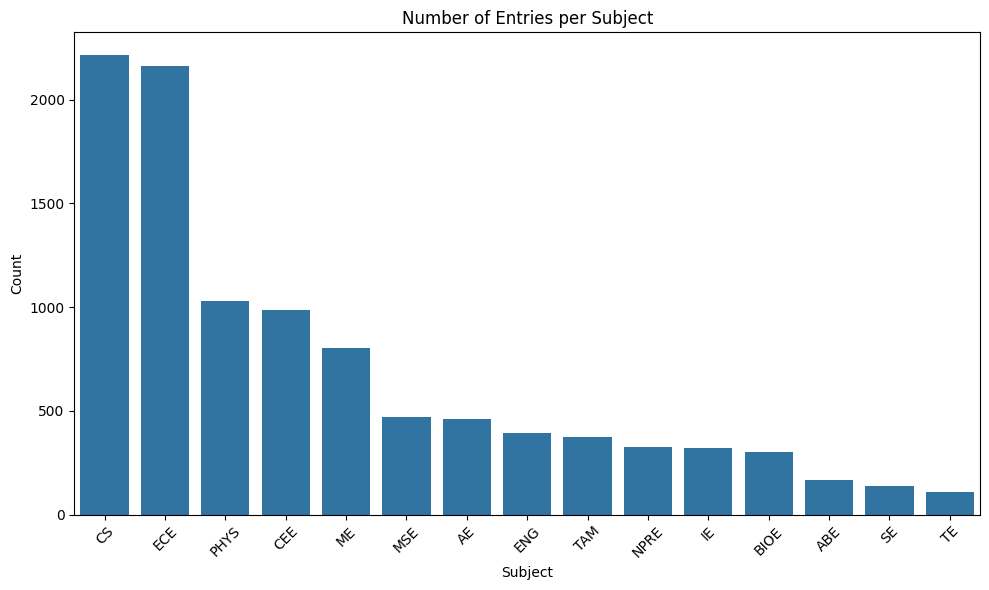

In [ ]:
subject_counts = data['Subject'].value_counts()
print("\nNumber of entries per subject:")
print(subject_counts)

# Plotting to visualize imbalance
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Subject', order=subject_counts.index)
plt.xticks(rotation=45)
plt.title("Number of Entries per Subject")
plt.xlabel("Subject")
plt.ylabel("Count")
plt.tight_layout()
plt.show()